In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# 2

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Descarga del zip
url = "https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip"
zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=False)

# Carpeta donde se va a extraer
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_zip')

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Extraer el zip
with zipfile.ZipFile(zip_dir, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

# El zip trae una carpeta 'cats_and_dogs' adentro
PATH = os.path.join(base_dir, 'cats_and_dogs')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Carpetas internas de train/validation
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Debug útil
print("PATH:", PATH)
print("Contenido de PATH:", os.listdir(PATH))
print("train_dir:", train_dir)
print("validation_dir:", validation_dir)
print("test_dir:", test_dir)

# Contar imágenes
total_train = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_val = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))
total_test = len(os.listdir(test_dir))

print("total_train:", total_train)
print("total_val:", total_val)
print("total_test:", total_test)


PATH: /root/.keras/datasets/cats_and_dogs_zip/cats_and_dogs
Contenido de PATH: ['.DS_Store', 'train', 'test', 'validation']
train_dir: /root/.keras/datasets/cats_and_dogs_zip/cats_and_dogs/train
validation_dir: /root/.keras/datasets/cats_and_dogs_zip/cats_and_dogs/validation
test_dir: /root/.keras/datasets/cats_and_dogs_zip/cats_and_dogs/test
total_train: 2000
total_val: 1000
total_test: 51


In [ ]:
# 3

batch_size = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Generadores con solo rescale
train_image_generator = ImageDataGenerator(rescale=1.0/255.)
validation_image_generator = ImageDataGenerator(rescale=1.0/255.)
test_image_generator = ImageDataGenerator(rescale=1.0/255.)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

# ⚠️ ÚNICO generador de test
test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,          # OJO: NO test_dir acá
    classes=['test'],        # le decimos que la única "clase" es la carpeta 'test'
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=50,           # hay 50 imágenes
    class_mode=None,         # sin etiquetas
    shuffle=False            # importante para el test de FCC
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


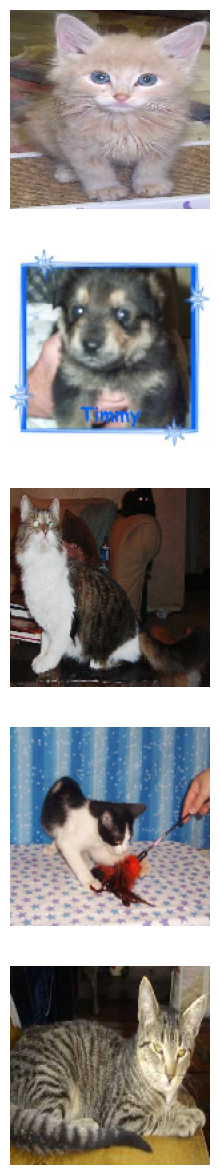

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5

train_image_generator = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [ ]:
# 6

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [ ]:
# 7

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8

EPOCHS = 15

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.4935 - loss: 0.7213 - val_accuracy: 0.5042 - val_loss: 0.6939
Epoch 2/15
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2:06 4s/step - accuracy: 0.4531 - loss: 0.6967

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 538ms/step - accuracy: 0.4531 - loss: 0.6967 - val_accuracy: 0.4990 - val_loss: 0.6939
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5396 - val_loss: 0.6915
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 497ms/step - accuracy: 0.6875 - loss: 0.6889 - val_accuracy: 0.5542 - val_loss: 0.6909
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.5143 - loss: 0.6932 - val_accuracy: 0.5354 - val_loss: 0.6881
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 540ms/step - accuracy: 0.3906 - loss: 0.7069 - val_accuracy: 0.5437 - val_loss: 0.6870
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.5164 - loss: 0.6930 - val_accuracy: 0.5208 - val_loss: 0.6926
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 588ms/step - accuracy: 0.5312 - loss: 0.6924 - val_accuracy: 0.5490 - val_loss: 0.6923
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.5203 - loss: 0.6930 - val_accuracy: 0.5010 - val_

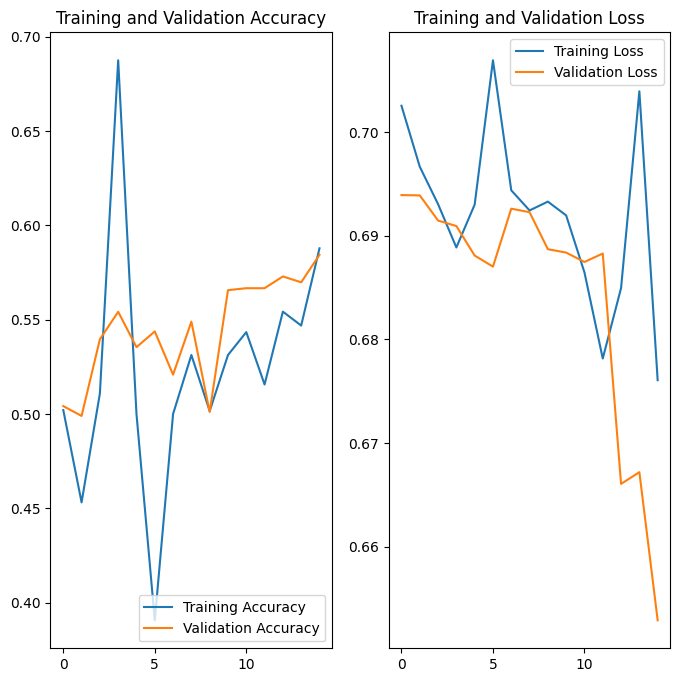

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Shape test_images: (50, 150, 150, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 469ms/step


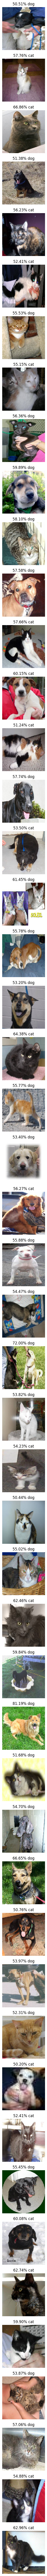

In [ ]:
# 10

# Obtenemos todas las imágenes de test en un solo batch
test_images = next(test_data_gen)  # 👈 solo un valor

print("Shape test_images:", test_images.shape)  # debería ser (50, 150, 150, 3)

# Probabilidades predichas por el modelo (entre 0 y 1)
preds = model.predict(test_images)

# Las convertimos a lista de floats
probabilities = preds.flatten().tolist()

# Mostramos las imágenes con sus probabilidades
plotImages(test_images, probabilities)


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
